# Minimum of quadratic function Demo

In this tutorial we will show how to find the minimum of a quadratic function using Auptimizer. We also demonstrate how to effectively switch between various HPO proposers such as Spearmint and BOHB.

# Running the Experiments 

In this experiment we try to find the best X such that f(X) is minimal.


Each instance of 'quad_min.py' would accept an X that calculates the value of the quadratic function. The ‘quad_min_[proposer].json’ file contains code to perform HPO using CPU resources and consider 50 samples for each proposer. We can easily switch between proposers and see how they choose different configurations to optimize the final performance.

To run the experiment use command- 

'python3 -m aup quad_min_[proposer].json' 



# Analysis 

We next analyze the experiment results using the sqlite database for our experiments. The details for the experiment can be found inn the jobs profile, but here we aim to compare the proposers. Experiment 1 is performed using BOHB, then random and finally Spearmint.

In [1]:
'''
Connect to the Auptimizer database
''' 

import sqlite3
import time
import datetime
import random

conn = sqlite3.connect('sqlite3.db')
c = conn.cursor()


In [2]:
'''
Function to compile and return details from a Auptimizer experiment. 
Takes experiment id as input, returns score, jobs ran for the experiments, and end time for each job.
''' 

def graph_data(ex, cursor):
    cursor.execute('SELECT score, jid, end_time FROM job WHERE typeof(score)==\'real\' and eid = '+ str(ex))
    data = cursor.fetchall()

    jobs = []
    score = []
    times =[]
    
    for row in data:
        times.append(row[2])
        jobs.append(row[1])
        score.append(row[0])

    times = [a-min(times) for a in times] 
    jobs = [a-min(jobs) for a in jobs]
    
    print(score)
    print(jobs)
    
    return (score, times, jobs)
    

In [3]:
'''
Compile results for grid search, random, spearmint, hyperband, hyperopt Proposers
''' 

s_ran, t_ran, j_ran = graph_data(2, c)
s_spe, t_spe, j_spe = graph_data(3, c)
s_bohb, t_bohb, j_bohb = graph_data(1, c)


[6148.106139221136, 10438.637919012073, 7415.6298730541, 6060.406530867955, 3664.920102436913, 8514.390146411502, 3909.7273413323915, 16227.975850616904, 18949.333977751823, 3002.7529813288706, 12791.65578998259, 5710.14811693708, 6586.3076663701, 17482.08784937461, 106.05097215471763, 157.98208630594334, 11.44000290631149, 14146.904978499952, 12357.080808454182, 15445.805059455917, 19541.970126709333, 13032.9272883446, 4347.975242825175, 12432.524670292085, 288.5003098979952, 8357.696833979042, 422.36446655402744, 18209.8318006542, 5559.088337974499, 3511.112188373727, 1431.0292860232905, 12232.83011505206, 4248.207908109023, 6595.336180527122, 10.303060762137134, 7785.924535077077, 7646.9372673592525, 7768.255367710197, 18174.35420915232, 9487.559731339637, 2639.9754755905624, 3899.819338147345, 9932.534803401542, 77.10024584741284, 9073.377353360214, 9179.004614490392, 906.1092905253714, 342.22184461100574, 2032.997899250835, 2701.989279003208, 6636.2871314115855, 3927.859009848557,

# Visualization

We can easily visualize the performance of the hyperparameter optimization algorithms for our current experiment and how configurations can affect the final performance. In the plots below we compare job performance and time with accuracy achieved. 

In [4]:
'''
Plots for the experiment results
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))


plt.plot(j_bohb, s_bohb)
plt.plot(j_ran, s_ran)
plt.plot(j_spe, s_spe)

plt.legend(['y = bohb','y = random', 'y = spearmint'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on Quad min')
plt.xlabel('Jobs')
plt.ylabel('Accuracy')


plt.show()

<Figure size 2000x1500 with 1 Axes>

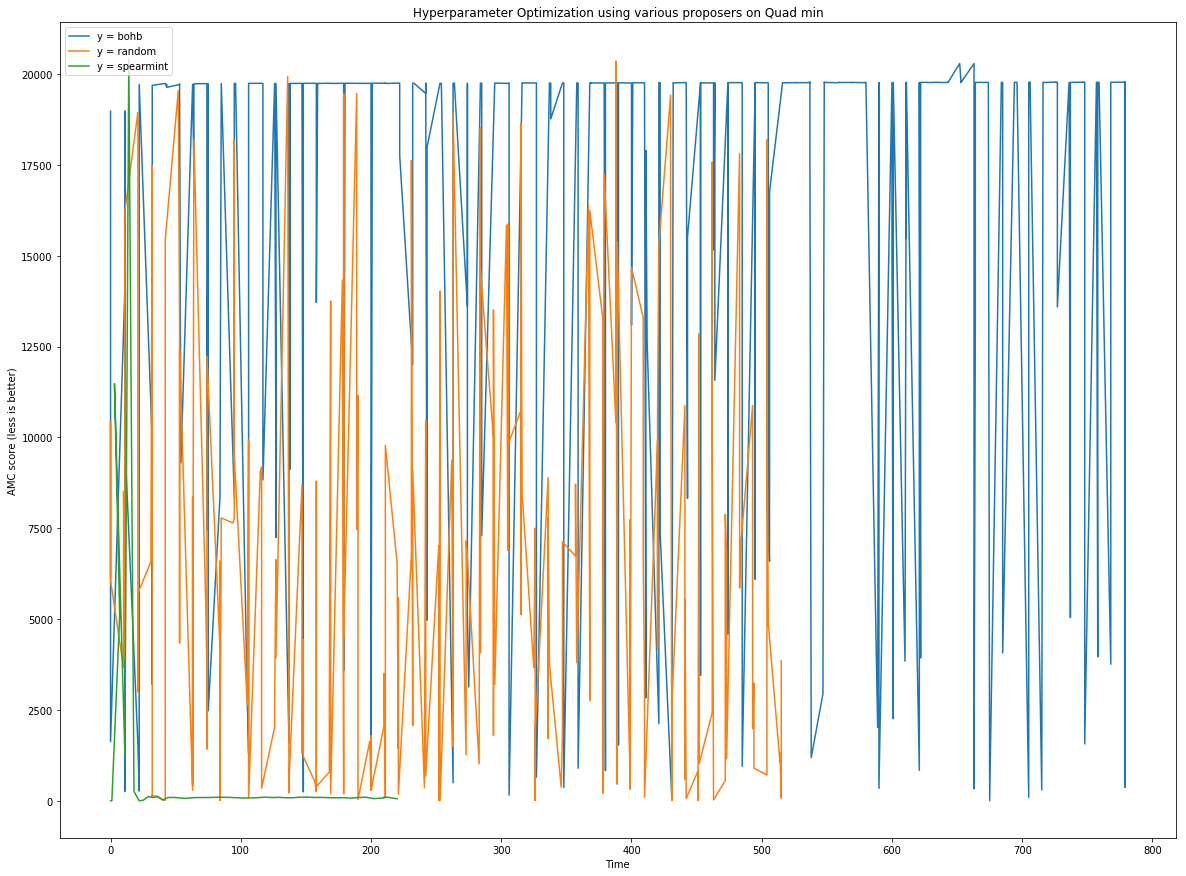

In [5]:
'''
Plots for the experiment results
'''


import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))


plt.plot(t_bohb, s_bohb)
plt.plot(t_ran, s_ran)
plt.plot(t_spe, s_spe)

plt.legend(['y = bohb','y = random', 'y = spearmint'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on Quad min')
plt.xlabel('Time')
plt.ylabel('AMC score (less is better)')

plt.show()

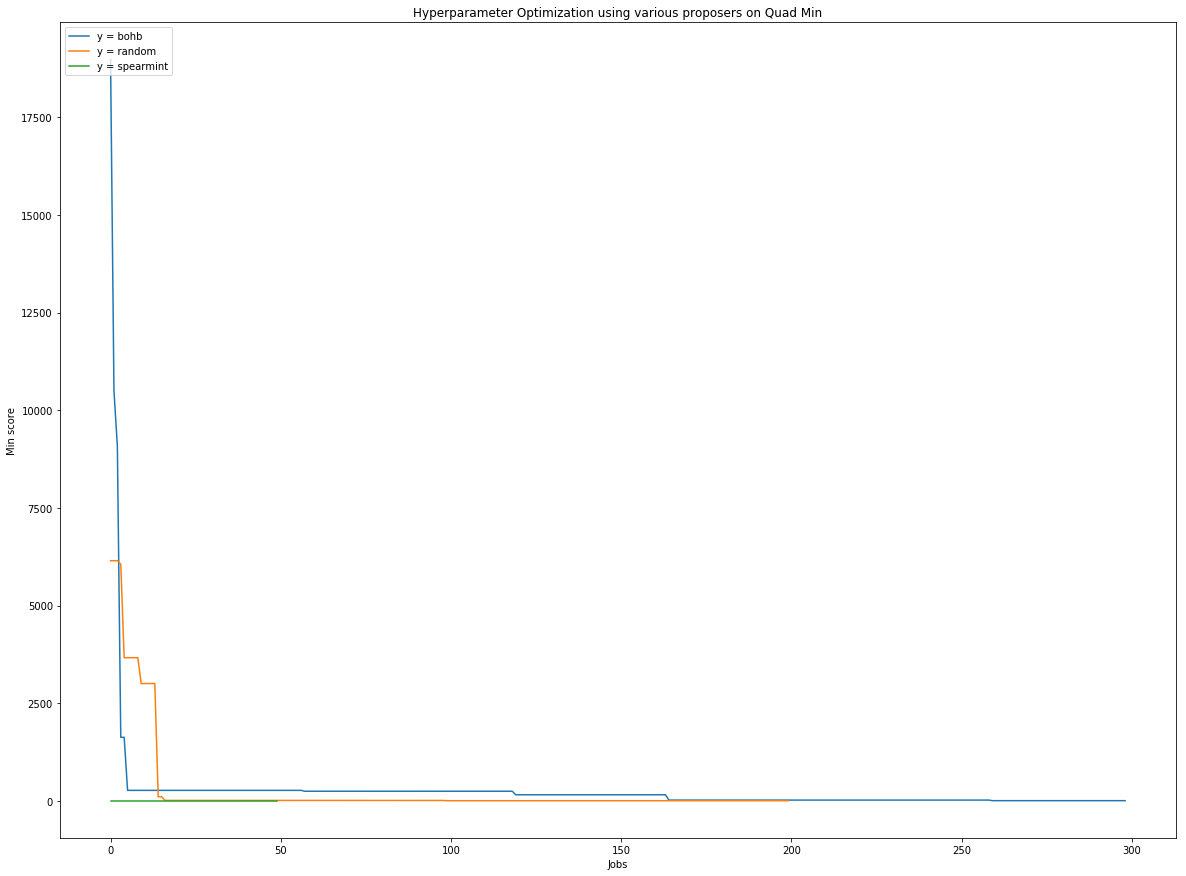

In [6]:
'''
Plots for the experiment results
'''

import sys

def min_so_far(arr):
    mmin=float('inf')
    new_arr=[]
    for _,x in enumerate(arr):
        if x<mmin:
            mmin=x
        new_arr.append(mmin)
    return new_arr

plt.figure(figsize=(20,15))


plt.plot(j_bohb, min_so_far(s_bohb))
plt.plot(j_ran, min_so_far(s_ran))
plt.plot(j_spe, min_so_far(s_spe))

plt.legend(['y = bohb','y = random', 'y = spearmint'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on Quad Min')
plt.xlabel('Jobs')
plt.ylabel('Min score')

plt.show()

# Using early stop to accelerate experiment convergence 

In order to use the early stop functionality, please check Examples/early_stopping/README.md. We will next compare
the efficiency of early stop with 3 policies: truncation, median and bandit.

In [7]:
conn2 = sqlite3.connect('../early_stopping/quad_equation_min/sqlite3.db')
c2 = conn2.cursor()

s_bohb_median, t_bohb_median, j_bohb_median = graph_data(7, c2)
s_bohb_bandit, t_bohb_bandit, j_bohb_bandit = graph_data(8, c2)
s_bohb_trunc, t_bohb_trunc, j_bohb_trunc = graph_data(5, c2)

[3.1986507685687813, 3.1240212831079313]
[0, 7]
[11588.561807897513, 10264.661252507878, 13259.660327218779, 9756.147263836081, 192.30551743308826, 54.01004445189671, 10.657509615206326, 3.542402417237454]
[0, 1, 2, 3, 4, 13, 66, 81]
[196.24204025146446, 46.05975048965503, 23.17190918287609, 3.2179274925402535, 9.197393904968242]
[0, 1, 2, 10, 69]


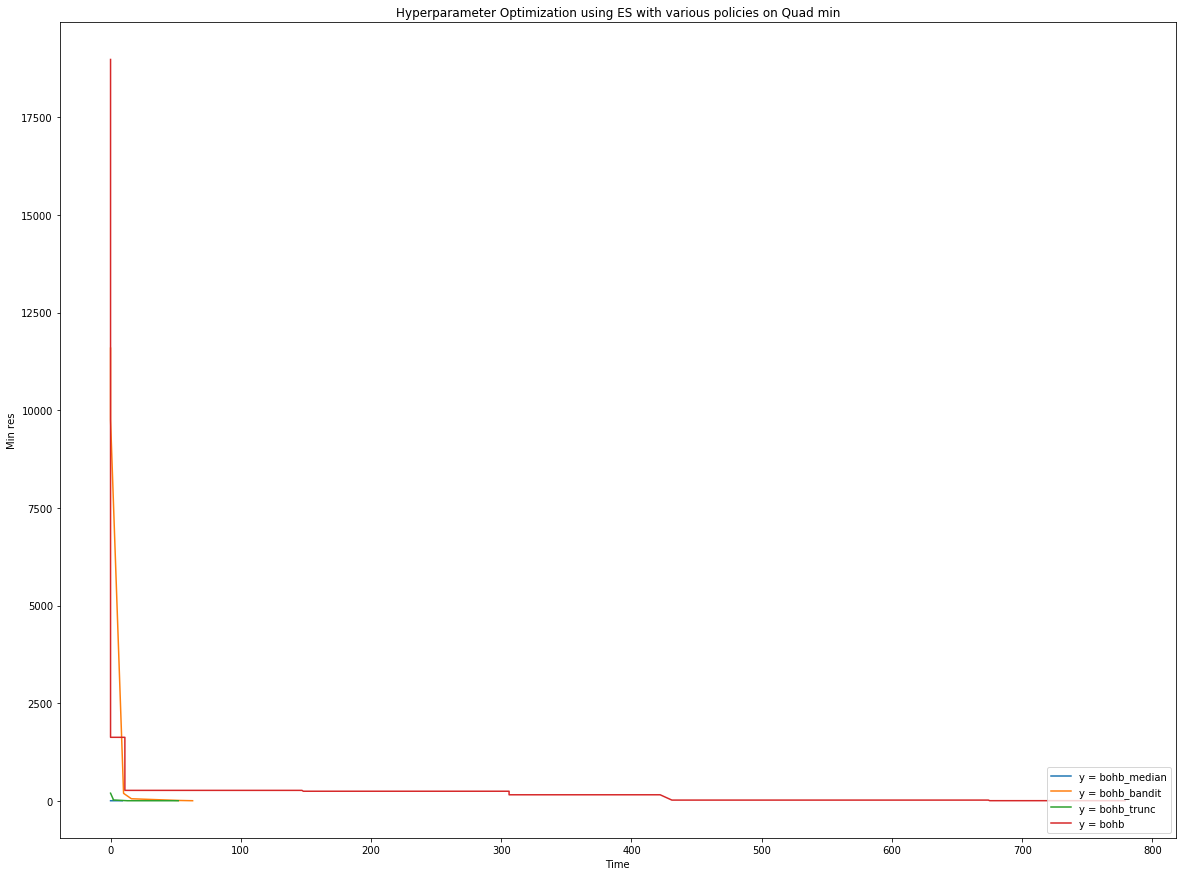

In [8]:
plt.figure(figsize=(20,15))

plt.plot(t_bohb_median, min_so_far(s_bohb_median))
plt.plot(t_bohb_bandit, min_so_far(s_bohb_bandit))
plt.plot(t_bohb_trunc, min_so_far(s_bohb_trunc))
plt.plot(t_bohb, min_so_far(s_bohb))

plt.legend(['y = bohb_median','y = bohb_bandit', 'y = bohb_trunc', 'y = bohb'], loc='lower right')

plt.title('Hyperparameter Optimization using ES with various policies on Quad min')
plt.xlabel('Time')
plt.ylabel('Min res')

plt.show()

In [9]:
s_random_median, t_random_median, j_random_median = graph_data(2, c2)
s_random_trunc, t_random_trunc, j_random_trunc = graph_data(6, c2)
s_random_bandit, t_random_bandit, j_random_bandit = graph_data(1, c2)

[6060.406530867955, 3664.920102436913, 3909.7273413323915, 3002.7529813288706, 106.05097215471763, 157.98208630594334, 11.44000290631149, 288.5003098979952, 422.36446655402744, 10.303060762137134, 77.10024584741284, 215.54895165905884, 251.65086979919593, 195.46347563258027, 191.5105114029914, 34.43100582618657, 87.0522160740486, 183.1439686948838, 11.34880226594397, 3.5498130271587858, 10.615665529087309, 100.70466265645877, 5.8995577127201795, 63.33929155979352, 10.099046262581181, 23.781863082338973, 71.8013571039346]
[0, 1, 3, 6, 11, 12, 13, 21, 23, 31, 40, 50, 58, 64, 66, 72, 79, 84, 94, 96, 123, 156, 163, 168, 170, 176, 195]
[6060.406530867955, 3664.920102436913, 3002.7529813288706, 106.05097215471763, 157.98208630594334, 11.44000290631149, 10.303060762137134, 77.10024584741284, 34.43100582618657, 11.34880226594397, 3.5498130271587858, 10.615665529087309, 5.8995577127201795, 10.099046262581181]
[0, 1, 6, 11, 12, 13, 31, 40, 72, 94, 96, 123, 163, 170]
[6148.106139221136, 7415.6298

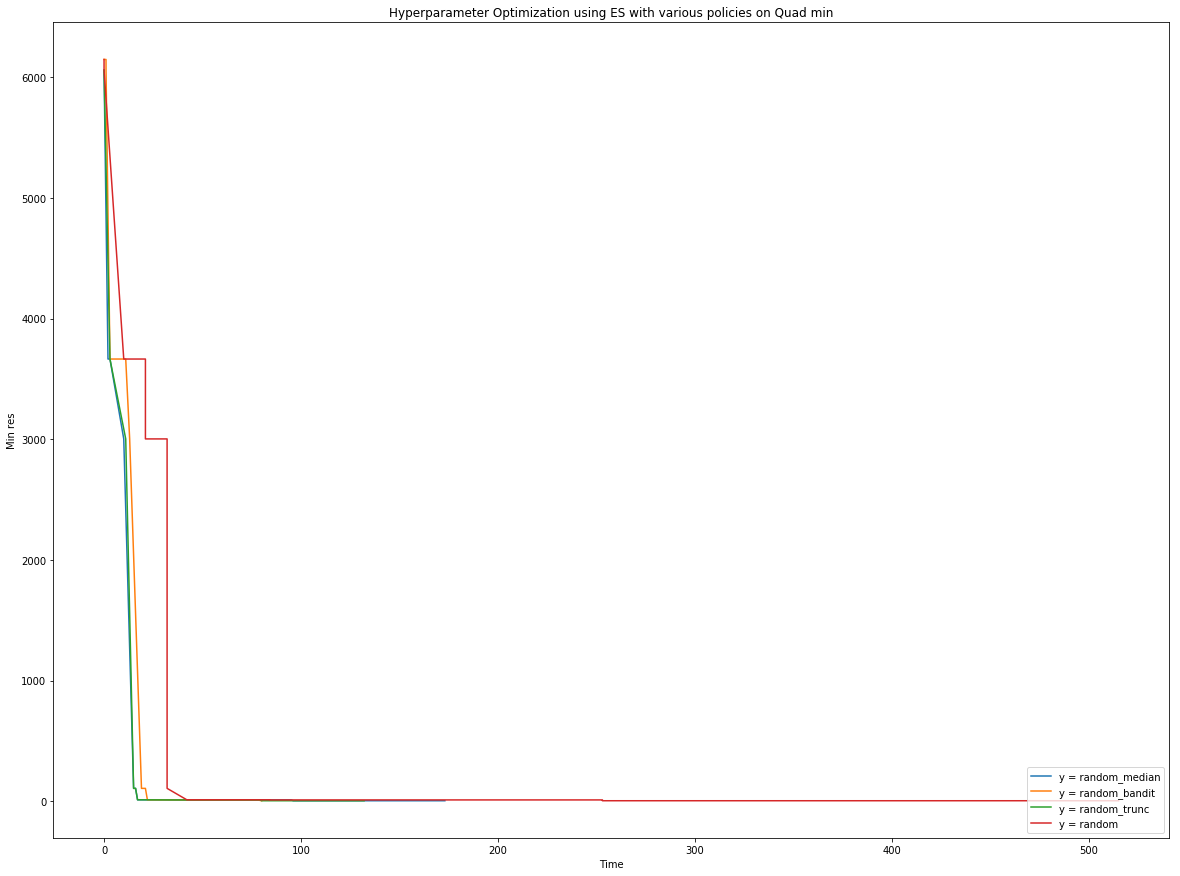

In [10]:
plt.figure(figsize=(20,15))

plt.plot(t_random_median, min_so_far(s_random_median))
plt.plot(t_random_bandit, min_so_far(s_random_bandit))
plt.plot(t_random_trunc, min_so_far(s_random_trunc))
plt.plot(t_ran, min_so_far(s_ran))

plt.legend(['y = random_median','y = random_bandit', 'y = random_trunc', 'y = random'], loc='lower right')

plt.title('Hyperparameter Optimization using ES with various policies on Quad min')
plt.xlabel('Time')
plt.ylabel('Min res')

plt.show()

In [11]:
s_spearmint_median, t_spearmint_median, j_spearmint_median = graph_data(9, c2)
s_spearmint_trunc, t_spearmint_trunc, j_spearmint_trunc = graph_data(1, c2)
s_spearmint_bandit, t_spearmint_bandit, j_spearmint_bandit = graph_data(8, c2)

[3.1, 3.1]
[0, 1]
[6148.106139221136, 7415.6298730541, 6060.406530867955, 3664.920102436913, 3909.7273413323915, 3002.7529813288706, 106.05097215471763, 157.98208630594334, 11.44000290631149, 10.303060762137134, 11.34880226594397, 3.5498130271587858]
[0, 2, 3, 4, 6, 9, 14, 15, 16, 34, 97, 99]
[11588.561807897513, 10264.661252507878, 13259.660327218779, 9756.147263836081, 192.30551743308826, 54.01004445189671, 10.657509615206326, 3.542402417237454]
[0, 1, 2, 3, 4, 13, 66, 81]


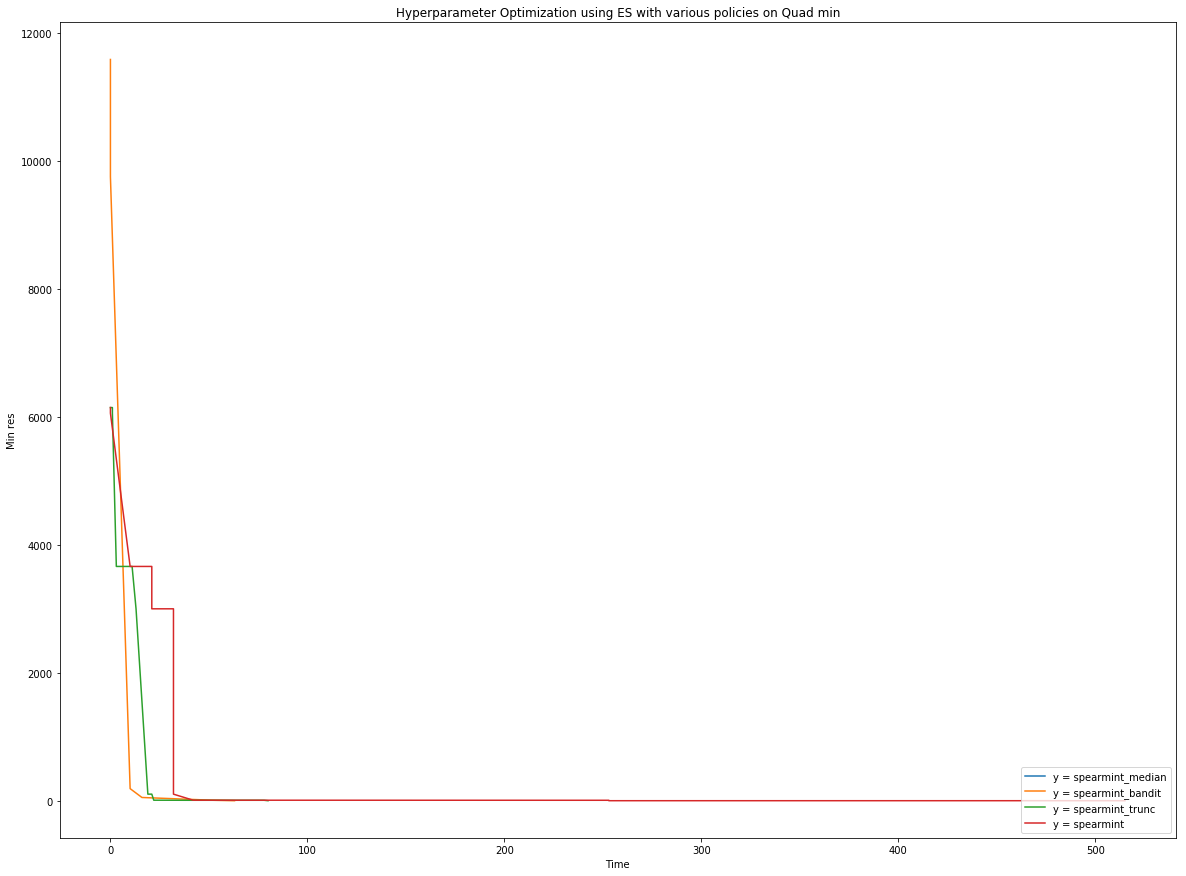

In [12]:
plt.figure(figsize=(20,15))

plt.plot(t_spearmint_median, min_so_far(s_spearmint_median))
plt.plot(t_spearmint_bandit, min_so_far(s_spearmint_bandit))
plt.plot(t_spearmint_trunc, min_so_far(s_spearmint_trunc))
plt.plot(t_ran, min_so_far(s_ran))

plt.legend(['y = spearmint_median','y = spearmint_bandit', 'y = spearmint_trunc', 'y = spearmint'], loc='lower right')

plt.title('Hyperparameter Optimization using ES with various policies on Quad min')
plt.xlabel('Time')
plt.ylabel('Min res')

plt.show()
